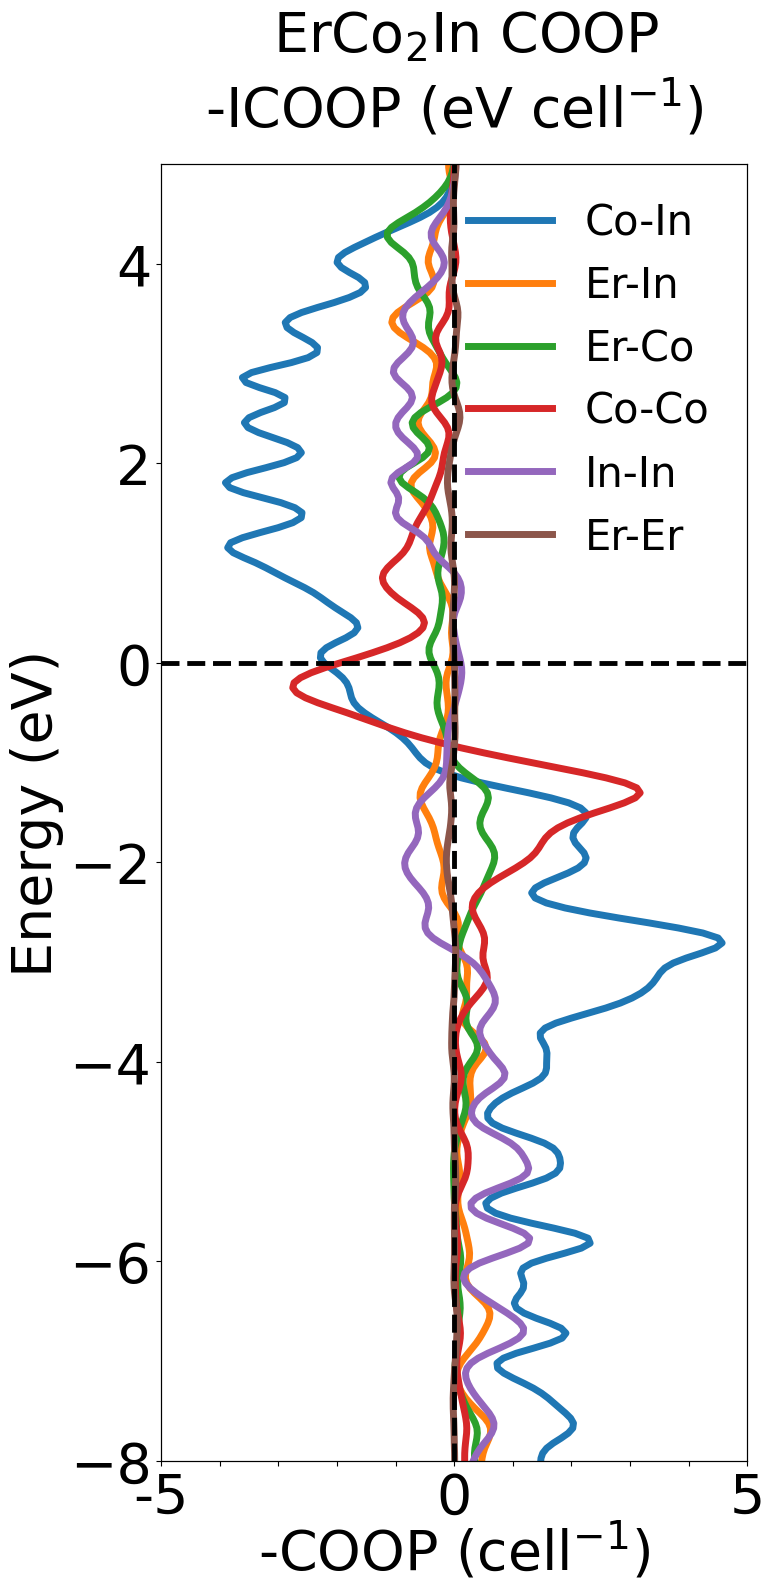

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "HoCo2In": 5.95068663,
    "CeCo2In": 5.97299143,
    "DyCo2In": 5.98527001,
    "LaCo2In": 8.04502225,
    "TbCo2In": 5.99781798,
    "NdCo2In": 5.92112163,
    "EuCo2In": 5.81390502,
    "GdCo2In": 5.99350898,
    "ErCo2In": 5.97357796,
    "SmCo2In": 5.80695439,
    "PrCo2In": 5.95613309,
}

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis

    for i, filename in enumerate(coop_files):
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label=file_name.replace('coop-', ''), linewidth=5)  # Set line width to 2

    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COOP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-8, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='upper right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' COOP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    plot_coop_contributions(structures_directory)


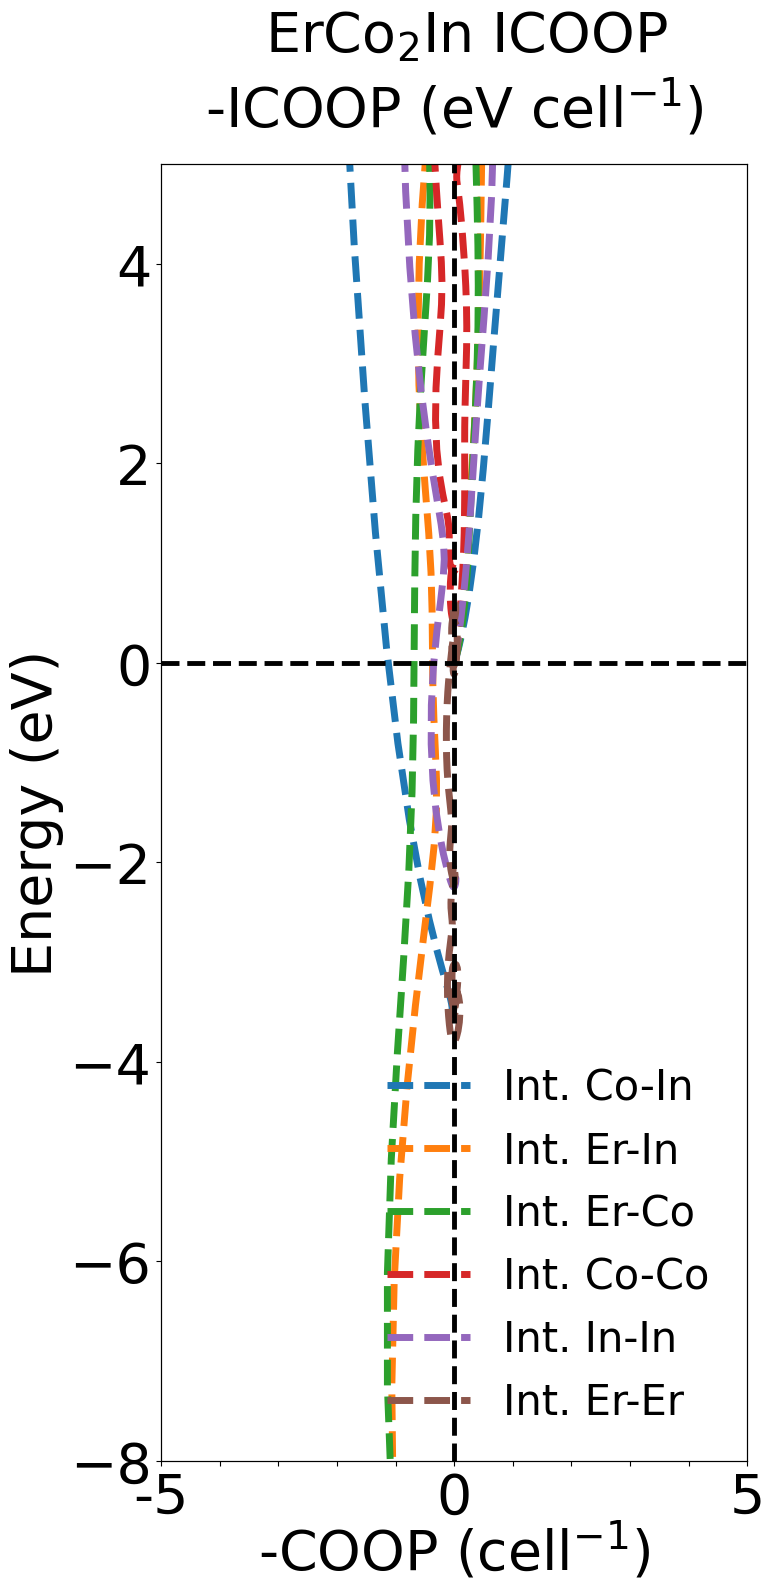

In [81]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)

    fig, ax = plt.subplots(figsize=(7.85, 16))  # Create figure and axis
    y_values = []

    for i, filename in enumerate(coop_files):
        # Read data from file
        data = np.loadtxt(filename)
        
        # Plot the data on the same axis with dashed lines
        x = data[:, 0]
        cumulative_x = np.cumsum(x)  # Calculate the cumulative sum of x-values
        y = cumulative_x  # Assign cumulative sum of x-values to y
        y_values.append((filename, y))  # Store filename and corresponding y-values

        file_name = os.path.splitext(os.path.basename(filename))[0]
        ax.plot(x, y, label='Int. ' + file_name.replace('coop-', ''), linewidth=5, linestyle='--')  # Set line width to 2 and linestyle to dashed


    # Plot a line at y=0 and x=0
    ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
    ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

    ax.set_xlabel('-COOP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
    ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

    ax2 = ax.twiny()  # Create a secondary x-axis at the top
    ax2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the top
    ax2.xaxis.set_label_coords(0.5, 1.03)  # Adjust the position of the x-axis label at the top

    # Set x-axis ticks for both axes
    ax.set_xticks([-5, 0, 5])
    ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    # Set tick labels for bottom x-axis
    ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

    # Set font size for ticks
    ax.tick_params(axis='y', labelsize=40)

    ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
    ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
    ax.set_ylim(-8, 5)  # Set the y-axis limits for subsequent plots
    ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

    # Remove x-axis tick marks and labels from the top axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)

    # Add legend to the plot
    ax.legend(frameon=False, fontsize=30, loc='lower right')

    # Add common title on the top
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    plt.suptitle(folder_name_subscripted + ' ICOOP', fontsize=40, y=.99, ha='center', x=0.6)

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')

    return y_values

def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    y_values = plot_coop_contributions(structures_directory)
    # Now y_values contains filename and corresponding y-values, you can use it for further processing or plotting.


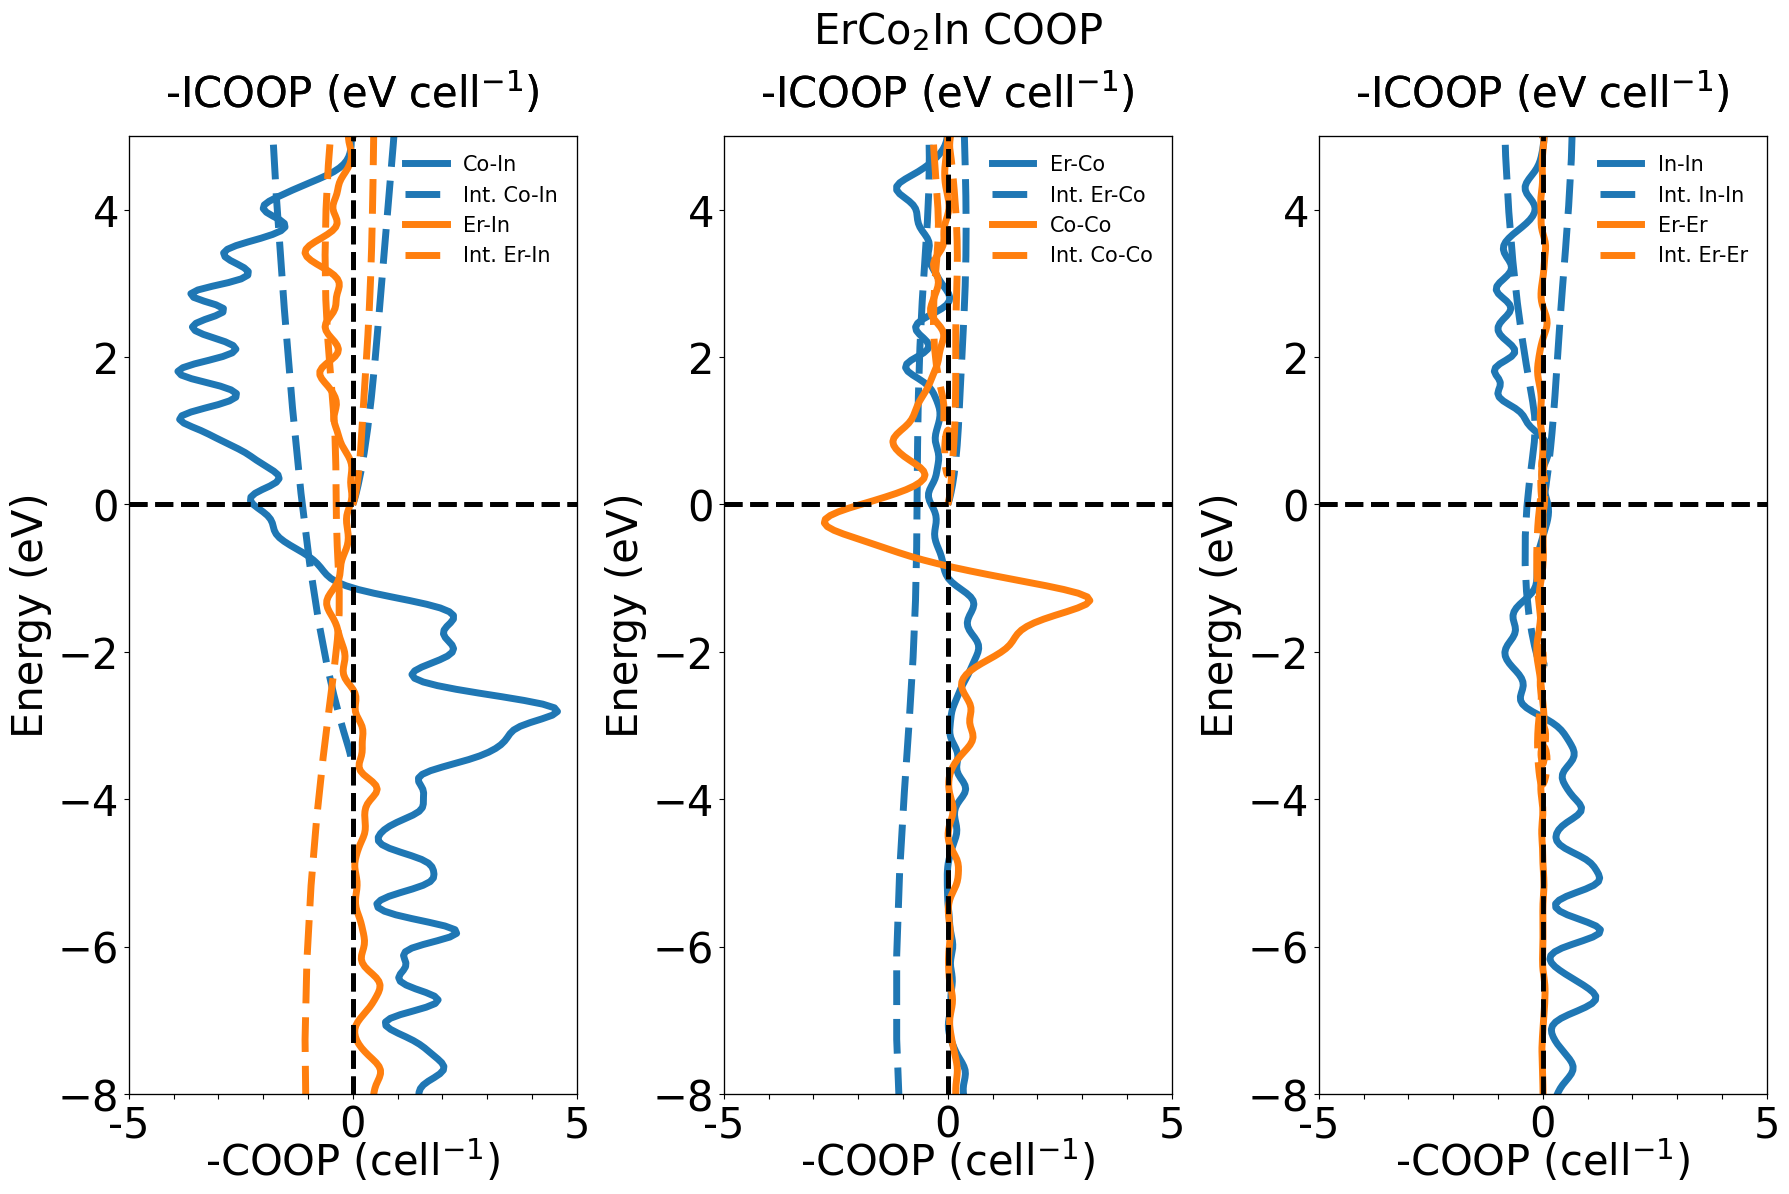

In [121]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "HoCo2In": 5.95068663,
    "CeCo2In": 5.97299143,
    "DyCo2In": 5.98527001,
    "LaCo2In": 8.04502225,
    "TbCo2In": 5.99781798,
    "NdCo2In": 5.92112163,
    "EuCo2In": 5.81390502,
    "GdCo2In": 5.99350898,
    "ErCo2In": 5.97357796,
    "SmCo2In": 5.80695439,
    "PrCo2In": 5.95613309,
}

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)

    fig, axs = plt.subplots(1, 3, figsize=(18, 12))  # Create figure and subplots

    for i in range(3):
        ax = axs[i]
        start_idx = i * 2
        end_idx = min(start_idx + 2, len(coop_files))

        for j in range(start_idx, end_idx):
            filename = coop_files[j]
            # Read data from file
            data = np.loadtxt(filename)

            # Get parent folder name for subtraction
            parent_folder = os.path.basename(os.path.dirname(filename))

            # Subtract corresponding value from y-values
            y = data[:, 1]
            if parent_folder in subtraction_values:
                y -= subtraction_values[parent_folder]

            # Plot the data on the same axis with default colors
            x = data[:, 0]
            file_name = os.path.splitext(os.path.basename(filename))[0]
            line_color = next(ax._get_lines.prop_cycler)['color']  # Get the color of the current line
            ax.plot(x, y, label=file_name.replace('coop-', ''), linewidth=5, color=line_color)  # Set line width to 2
            
            # Calculate cumulative sum of x data and plot on Y2
            y2 = np.cumsum(x)
            ax.plot(x, y2, '--', linewidth=5, dashes=(5, 2), label=f'Int. {file_name.replace("coop-", "")}', color=line_color)

            # Plot a line at y=0 and x=0
            ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
            ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

            ax.set_xlabel('-COOP (cell$^{-1}$)', fontsize=30, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
            ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

            ax.set_xticks([-5, 0, 5])
            ax.set_xticklabels(['-5', '0', '5'], fontsize=30)

            # Set font size for ticks
            ax.tick_params(axis='y', labelsize=30)

            ax.set_ylabel('Energy (eV)', fontsize=30)  # Set font size for y-axis label
            ax.set_title("", fontsize=30, pad=5)  # Set an empty title to remove file name
            ax.set_ylim(-8, 5)  # Set the y-axis limits for subsequent plots
            ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

            # Remove x-axis tick marks and labels from the top axis
            ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

            # Add legend to the plot
            ax.legend(frameon=False, fontsize=15, loc='upper right')

            # Add common title on the top
            folder_name = os.path.basename(directory)
            folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
            fig.suptitle(folder_name_subscripted + f' COOP', fontsize=30, y=0.99, ha='center', x=0.535)

            # Create a secondary x-axis at the top
            ax2 = ax.twiny()
            ax2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=30, labelpad=5)
            ax2.xaxis.set_label_coords(0.5, 1.03)
            ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    fig.savefig(output_filename, bbox_inches='tight')


def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    plot_coop_contributions(structures_directory)


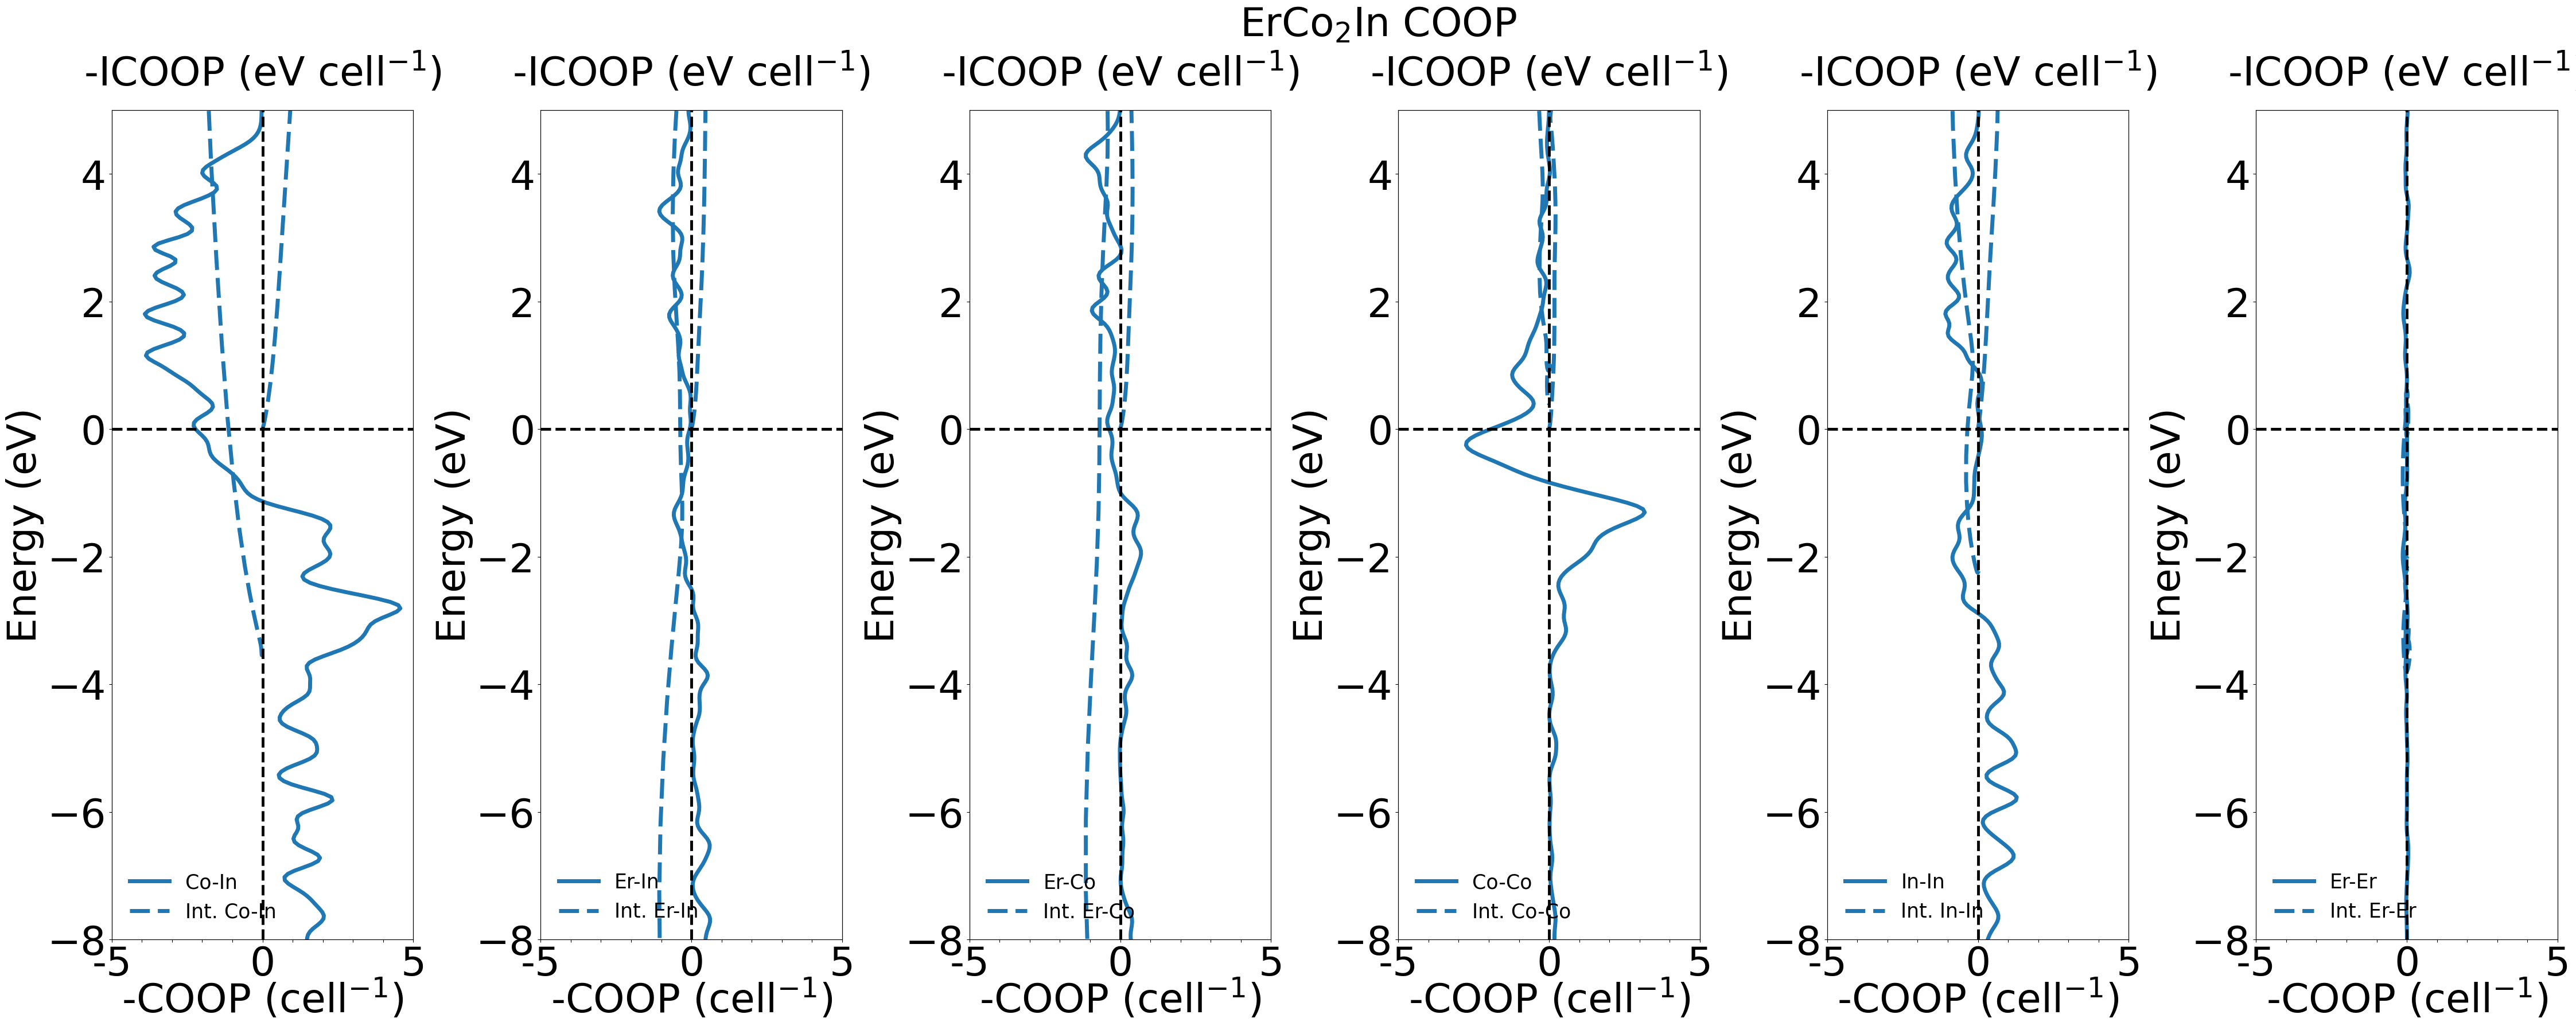

In [130]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "HoCo2In": 5.95068663,
    "CeCo2In": 5.97299143,
    "DyCo2In": 5.98527001,
    "LaCo2In": 8.04502225,
    "TbCo2In": 5.99781798,
    "NdCo2In": 5.92112163,
    "EuCo2In": 5.81390502,
    "GdCo2In": 5.99350898,
    "ErCo2In": 5.97357796,
    "SmCo2In": 5.80695439,
    "PrCo2In": 5.95613309,
}

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)

    fig, axs = plt.subplots(1, 6, figsize=(45, 18))  # Create figure and subplots

    for i, ax in enumerate(axs):
        if i >= len(coop_files):
            break

        filename = coop_files[i]
        # Read data from file
        data = np.loadtxt(filename)

        # Get parent folder name for subtraction
        parent_folder = os.path.basename(os.path.dirname(filename))

        # Subtract corresponding value from y-values
        y = data[:, 1]
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]

        # Plot the data on the same axis with default colors
        x = data[:, 0]
        file_name = os.path.splitext(os.path.basename(filename))[0]
        line_color = next(ax._get_lines.prop_cycler)['color']  # Get the color of the current line
        ax.plot(x, y, label=file_name.replace('coop-', ''), linewidth=5, color=line_color)  # Set line width to 2

        # Calculate cumulative sum of x data and plot on Y2
        y2 = np.cumsum(x)
        ax.plot(x, y2, '--', linewidth=5, dashes=(5, 2), label=f'Int. {file_name.replace("coop-", "")}', color=line_color)

        # Plot a line at y=0 and x=0
        ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
        ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

        ax.set_xlabel('-COOP (cell$^{-1}$)', fontsize=50, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
        ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

        ax.set_xticks([-5, 0, 5])
        ax.set_xticklabels(['-5', '0', '5'], fontsize=50)

        # Set font size for ticks
        ax.tick_params(axis='y', labelsize=50)

        ax.set_ylabel('Energy (eV)', fontsize=50)  # Set font size for y-axis label
        ax.set_title("", fontsize=50, pad=5)  # Set an empty title to remove file name
        ax.set_ylim(-8, 5)  # Set the y-axis limits for subsequent plots
        ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

        # Remove x-axis tick marks and labels from the top axis
        ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

        # Add legend to the plot
        ax.legend(frameon=False, fontsize=25, loc='lower left')

        # Add common title on the top
        folder_name = os.path.basename(directory)
        folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
        fig.suptitle(folder_name_subscripted + f' COOP', fontsize=50, y=0.99, ha='center', x=0.535)

        # Create a secondary x-axis at the top
        ax2 = ax.twiny()
        ax2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=50, labelpad=5)
        ax2.xaxis.set_label_coords(0.5, 1.03)
        ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    #output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    #fig.savefig(output_filename, bbox_inches='tight')


def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    plot_coop_contributions(structures_directory)


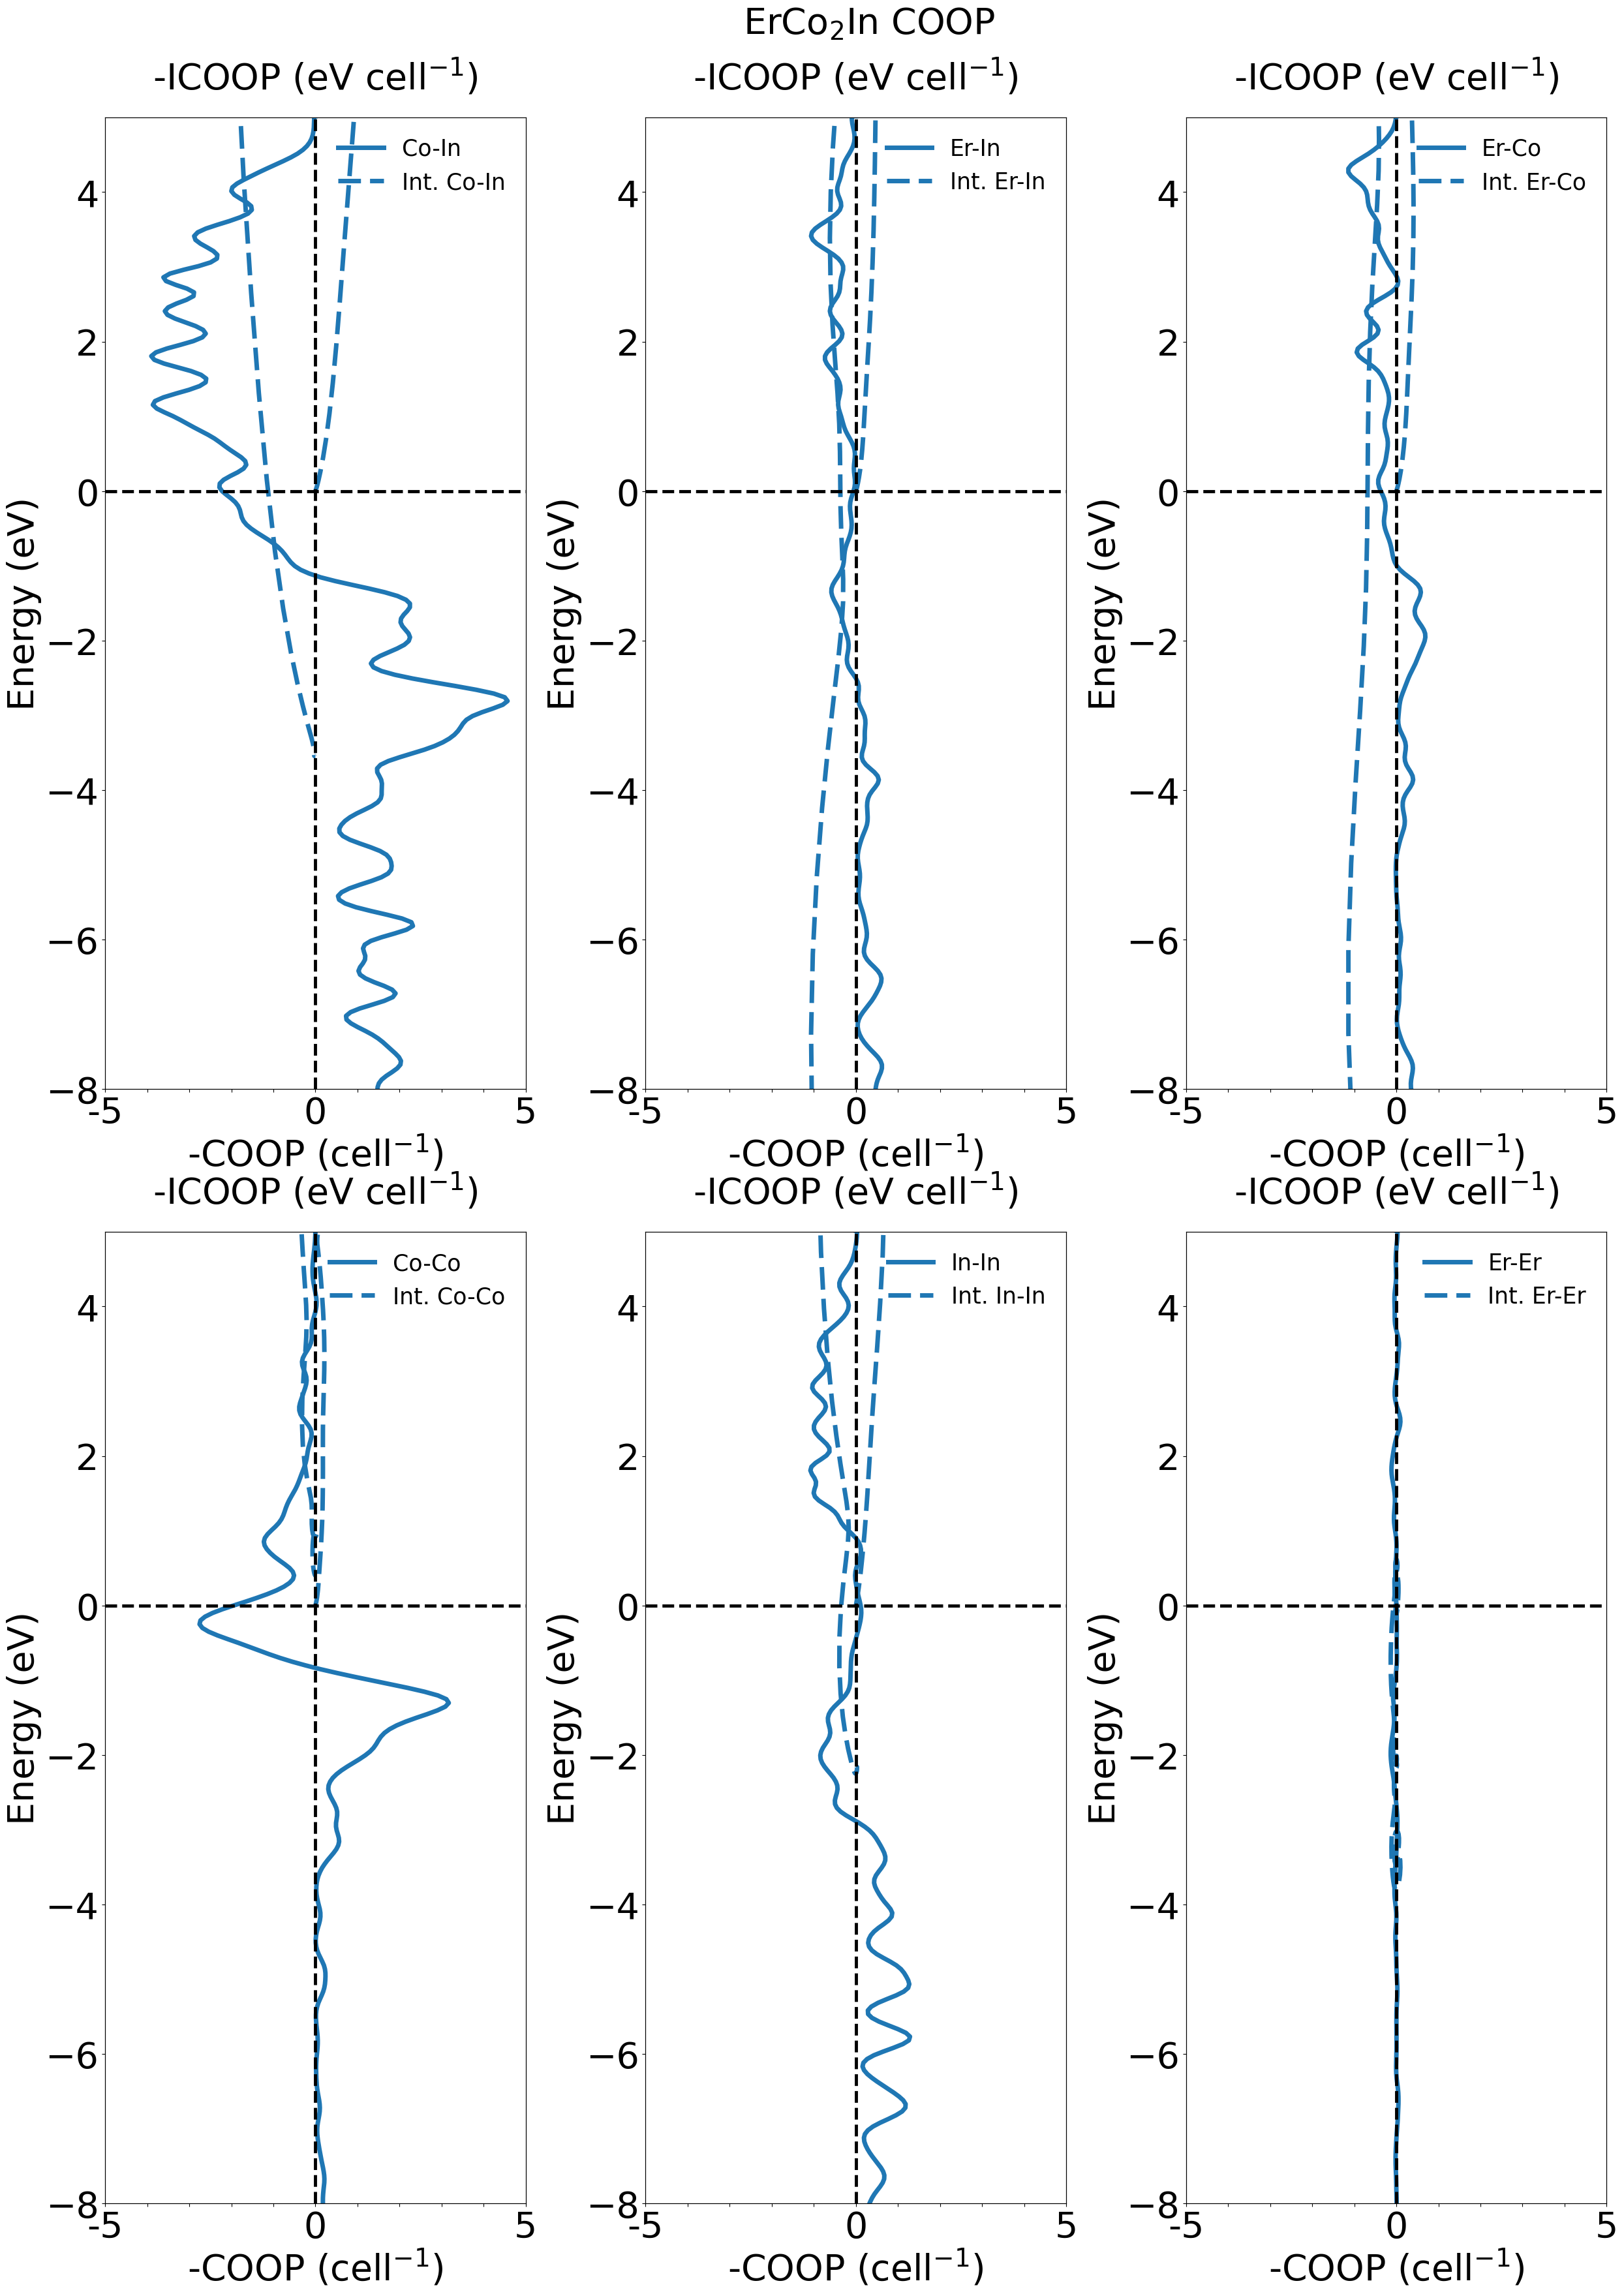

In [144]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re  # Import regular expression module
import glob

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "HoCo2In": 5.95068663,
    "CeCo2In": 5.97299143,
    "DyCo2In": 5.98527001,
    "LaCo2In": 8.04502225,
    "TbCo2In": 5.99781798,
    "NdCo2In": 5.92112163,
    "EuCo2In": 5.81390502,
    "GdCo2In": 5.99350898,
    "ErCo2In": 5.97357796,
    "SmCo2In": 5.80695439,
    "PrCo2In": 5.95613309,
}

def plot_coop_contributions(directory):
    coop_files = get_coop_files(directory)

    fig, axs = plt.subplots(2, 3, figsize=(25, 35))  # Create figure and subplots

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]
            idx = i * 3 + j
            if idx >= len(coop_files):
                break

            filename = coop_files[idx]
            # Read data from file
            data = np.loadtxt(filename)

            # Get parent folder name for subtraction
            parent_folder = os.path.basename(os.path.dirname(filename))

            # Subtract corresponding value from y-values
            y = data[:, 1]
            if parent_folder in subtraction_values:
                y -= subtraction_values[parent_folder]

            # Plot the data on the same axis with default colors
            x = data[:, 0]
            file_name = os.path.splitext(os.path.basename(filename))[0]
            line_color = next(ax._get_lines.prop_cycler)['color']  # Get the color of the current line
            ax.plot(x, y, label=file_name.replace('coop-', ''), linewidth=5, color=line_color)  # Set line width to 2
            
            # Calculate cumulative sum of x data and plot on Y2
            y2 = np.cumsum(x)
            ax.plot(x, y2, '--', linewidth=5, dashes=(5, 2), label=f'Int. {file_name.replace("coop-", "")}', color=line_color)

            # Plot a line at y=0 and x=0
            ax.axhline(0, color='black', linestyle='--', linewidth=3.5)
            ax.axvline(0, color='black', linestyle='--', linewidth=3.5)

            ax.set_xlabel('-COOP (cell$^{-1}$)', fontsize=40, labelpad=5)  # Set font size for x-axis label and adjust label position at the bottom
            ax.xaxis.set_label_coords(0.5, -0.045)  # Adjust the position of the x-axis label at the bottom

            ax.set_xticks([-5, 0, 5])
            ax.set_xticklabels(['-5', '0', '5'], fontsize=40)

            # Set font size for ticks
            ax.tick_params(axis='y', labelsize=40)

            ax.set_ylabel('Energy (eV)', fontsize=40)  # Set font size for y-axis label
            ax.set_title("", fontsize=40, pad=10)  # Set an empty title to remove file name
            ax.set_ylim(-8, 5)  # Set the y-axis limits for subsequent plots
            ax.set_xlim(-5, 5)  # Set the adjusted x-axis limits
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
            ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis

            # Remove x-axis tick marks and labels from the top axis
            ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

            # Add legend to the plot
            ax.legend(frameon=False, fontsize=25, loc='upper right')

            # Add common title on the top
            folder_name = os.path.basename(directory)
            folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
            fig.suptitle(folder_name_subscripted + f' COOP', fontsize=40, y=1.0, ha='center', x=0.535)

            # Create a secondary x-axis at the top
            ax2 = ax.twiny()
            ax2.set_xlabel('-ICOOP (eV cell$^{-1}$)', fontsize=40, labelpad=5)
            ax2.xaxis.set_label_coords(0.5, 1.03)
            ax2.set_xticks([])  # Remove x-axis ticks from the top axis

    plt.tight_layout()
    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    #output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/Structures/Graphs/COOP', folder_name + ".png")
    #fig.savefig(output_filename, bbox_inches='tight')


def get_coop_files(directory):
    # Use glob to find all files starting with "coop-" in the specified directory
    coop_files = glob.glob(os.path.join(directory, 'coop-*'))
    return coop_files

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "Structures/ErCo2In")

    plot_coop_contributions(structures_directory)
